In [60]:
# Dependencies
import json
import requests
import csv
import matplotlib.pyplot as plt
import requests
import random
import pandas as pd
import openweathermapy.core as owm

In [61]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = "c22a9ca464bdedf3a3d44bce78dff026"
settings = {"units": "metric", "appid": api_key}
query_url = f"{url}appid={api_key}&units={units}&q="

# pd. read converts world_cities into a data frame
world_cities = pd.read_csv("citipy-0.0.5/citipy/worldcities.csv")
filename = "citipy-0.0.5/citipy/worldcities.csv"

In [62]:
# Use wrapper to see how the data is structured
current_weather_paris = owm.get_current("Paris", **settings)
print(f"Current weather object for Paris: {current_weather_paris}.")

Current weather object for Paris: {'coord': {'lon': 2.35, 'lat': 48.86}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 10.37, 'pressure': 1000, 'humidity': 76, 'temp_min': 10, 'temp_max': 11}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 220}, 'clouds': {'all': 0}, 'dt': 1522778400, 'sys': {'type': 1, 'id': 5610, 'message': 0.013, 'country': 'FR', 'sunrise': 1522732972, 'sunset': 1522779922}, 'id': 2988507, 'name': 'Paris', 'cod': 200}.


In [63]:
# a cleaner way to see it
current_weather_paris

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 48.86, 'lon': 2.35},
 'dt': 1522778400,
 'id': 2988507,
 'main': {'humidity': 76,
  'pressure': 1000,
  'temp': 10.37,
  'temp_max': 11,
  'temp_min': 10},
 'name': 'Paris',
 'sys': {'country': 'FR',
  'id': 5610,
  'message': 0.013,
  'sunrise': 1522732972,
  'sunset': 1522779922,
  'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
   'icon': '01d',
   'id': 800,
   'main': 'Clear'}],
 'wind': {'deg': 220, 'speed': 4.1}}

In [64]:
# getting 500 random cities from the CSV

df = world_cities.sample(n=500)
df.head()

,Country,City,Latitude,Longitude
43441,us,greenfield,39.785000,-85.769444
18573,in,mannarakkat,10.983333,76.466667
37263,ru,nogir,43.081620,44.636497
3043,br,inhapim,-19.550000,-42.116667
36833,ru,litovko,49.236111,135.174167


In [81]:

# this city is a key and, for some reason, the for loop can't find the cities in the list when I run it this way:
#cities = df["City"]

#instead, I just listed a few cities to demonstrate competency with the skills required for the rest of the exercise.

cities = ["Oslo", "Paris", "London", "Lagos", "Caracas", "Hong Kong", "Kigali", "New York"]

In [82]:
# Loop through the list of cities and perform a request for data on each

#library called requests for api calls

lat = []
temp = []
humidity = []
clouds = []
wind_speed = []

# in this case "city" is the iterator 

for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    clouds.append(response['clouds']['all'])
    temp.append(response['main']['temp'])
    wind_speed.append(response['wind']['speed'])
    humidity.append(response['main']['humidity'])    
    
    
# the variable you print below references the word just before ".append"    

print(f"The humidity information received is: {humidity}")
print(f"The cloudiness information received is: {clouds}")
print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")
print(f"The wind speed information received is: {wind_speed}")

#Include a print log of each city as it's being processed with the city number, city name, and requested URL.

The humidity information received is: [64, 76, 71, 83, 70, 83, 93, 93]
The cloudiness information received is: [75, 0, 75, 40, 40, 20, 75, 90]
The latitude information received is: [59.91, 48.86, 51.51, 6.46, 10.51, 22.28, -1.95, 40.73]
The temperature information received is: [1, 10.37, 10.73, 29, 30, 23, 17, 4.16]
The wind speed information received is: [1.5, 4.1, 5.7, 3.6, 1.5, 2.6, 1.21, 4.1]


In [90]:
# create a data frame | keys correspond to column names

weather_dict = {
    "City": cities,
    "Latitude": lat,
    "Humidity": humidity,
    "Cloudy": clouds,
    "Temperature": temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Cloudy,Humidity,Latitude,Temperature,Wind Speed
0,Oslo,75,64,59.91,1.00,1.50
1,Paris,0,76,48.86,10.37,4.10
2,London,75,71,51.51,10.73,5.70
3,Lagos,40,83,6.46,29.00,3.60
4,Caracas,40,70,10.51,30.00,1.50
5,Hong Kong,20,83,22.28,23.00,2.60
6,Kigali,75,93,-1.95,17.00,1.21
7,New York,90,93,40.73,4.16,4.10


In [95]:
weather_data.to_csv(path_or_buf="WeatherPython")

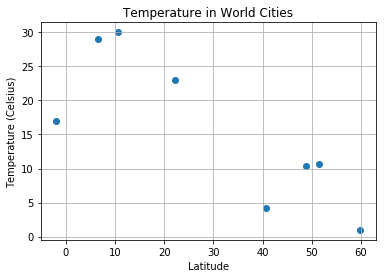

In [84]:
#Temperature (F) vs. Latitude

plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

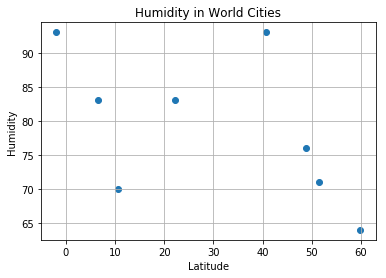

In [85]:
# Humidity (%) vs. Latitude

plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

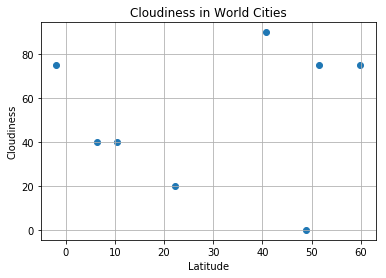

In [86]:
# Cloudiness (%) vs. Latitude

plt.scatter(weather_data["Latitude"], weather_data["Cloudy"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

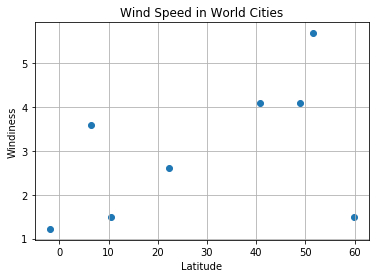

In [87]:
# Wind Speed (mph) vs. Latitude

plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Windiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindinessInWorldCities.png")

# Show plot
plt.show()